In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# import dataset
emp = pd.read_csv("employee attrition.csv")

In [3]:
# glimpse of data
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# data understanding
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# rearrange columns
emp = emp[['Department', 'EducationField', 'Age', 'Gender', 'MaritalStatus',
           'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
           'EnvironmentSatisfaction', 'HourlyRate',
           'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
           'OverTime', 'PercentSalaryHike', 'PerformanceRating',
           'RelationshipSatisfaction', 'StockOptionLevel',
           'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
           'YearsWithCurrManager', 'Attrition']]
emp.head()

,Department,EducationField,Age,Gender,MaritalStatus,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,Sales,Life Sciences,41,Female,Single,Travel_Rarely,1102,1,2,2,...,1,0,8,0,1,6,4,0,5,Yes
1,Research & Development,Life Sciences,49,Male,Married,Travel_Frequently,279,8,1,3,...,4,1,10,3,3,10,7,1,7,No
2,Research & Development,Other,37,Male,Single,Travel_Rarely,1373,2,2,4,...,2,0,7,3,3,0,0,0,0,Yes
3,Research & Development,Life Sciences,33,Female,Married,Travel_Frequently,1392,3,4,4,...,3,0,8,3,3,8,7,3,0,No
4,Research & Development,Medical,27,Male,Married,Travel_Rarely,591,2,1,1,...,4,1,6,3,3,2,2,2,2,No


In [6]:
# separate between numerical and object cols
numeric_cols = []
object_cols = []

for col in emp.columns:
    if emp[col].dtype == 'int64' or emp[col].dtype == 'float64':
        numeric_cols.append(col)
    elif emp[col].dtype == 'object':
        object_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(numeric_cols)}')
print(f'Total Object Columns  : {len(object_cols)}')

Total Numeric Columns : 23
Total Object Columns  : 8


In [7]:
# desc. stats on numerical cols
emp[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [8]:
# desc. stats on obj cols
emp[object_cols].describe().T

,count,unique,top,freq
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
MaritalStatus,1470,3,Married,673
BusinessTravel,1470,3,Travel_Rarely,1043
JobRole,1470,9,Sales Executive,326
OverTime,1470,2,No,1054
Attrition,1470,2,No,1233


In [9]:
def function_dist(df, cols, hue=None, num_bins=10):
    # reference: https://matplotlib.org/stable/gallery/statistics/histogram_features.html#sphx-glr-gallery-statistics-histogram-features-py

    if len(cols) <= 6:
        c, r = 3, 2
    elif len(cols) <= 12:
        c, r = 6, 2
    elif len(cols) <= 18:
        c, r = 6, 3
    elif len(cols) <= 24:
        c, r = 6, 4
    elif len(cols) <= 30:
        c, r = 6, 5
    
    figsize = (5*c, 3*r)
    plt.figure(figsize=figsize)
    sns.set_palette('Set2')
    
    for i, col in enumerate(cols):
        mu = np.mean(df[col])  # mean of distribution
        sigma = np.std(df[col])  # standard deviation of distribution

        plt.subplot(r, c, i+1)
        
        # Histogram of the data
        if hue:
            for value in df[hue].unique():
                subset = df[df[hue] == value]
                n, bins, patches = plt.hist(subset[col], bins=num_bins, density=True, alpha=0.85, label=value)
            plt.legend()
        else:
            n, bins, patches = plt.hist(df[col], bins=num_bins, density=True)

        # Add a 'best fit' line
        y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
        plt.plot(bins, y, '--', color='grey')
        plt.xlabel('Value')
        plt.ylabel('Probability density')
        plt.title(f'{col}\n$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

    # Tweak spacing to prevent clipping of ylabel
    plt.tight_layout()
    plt.show()

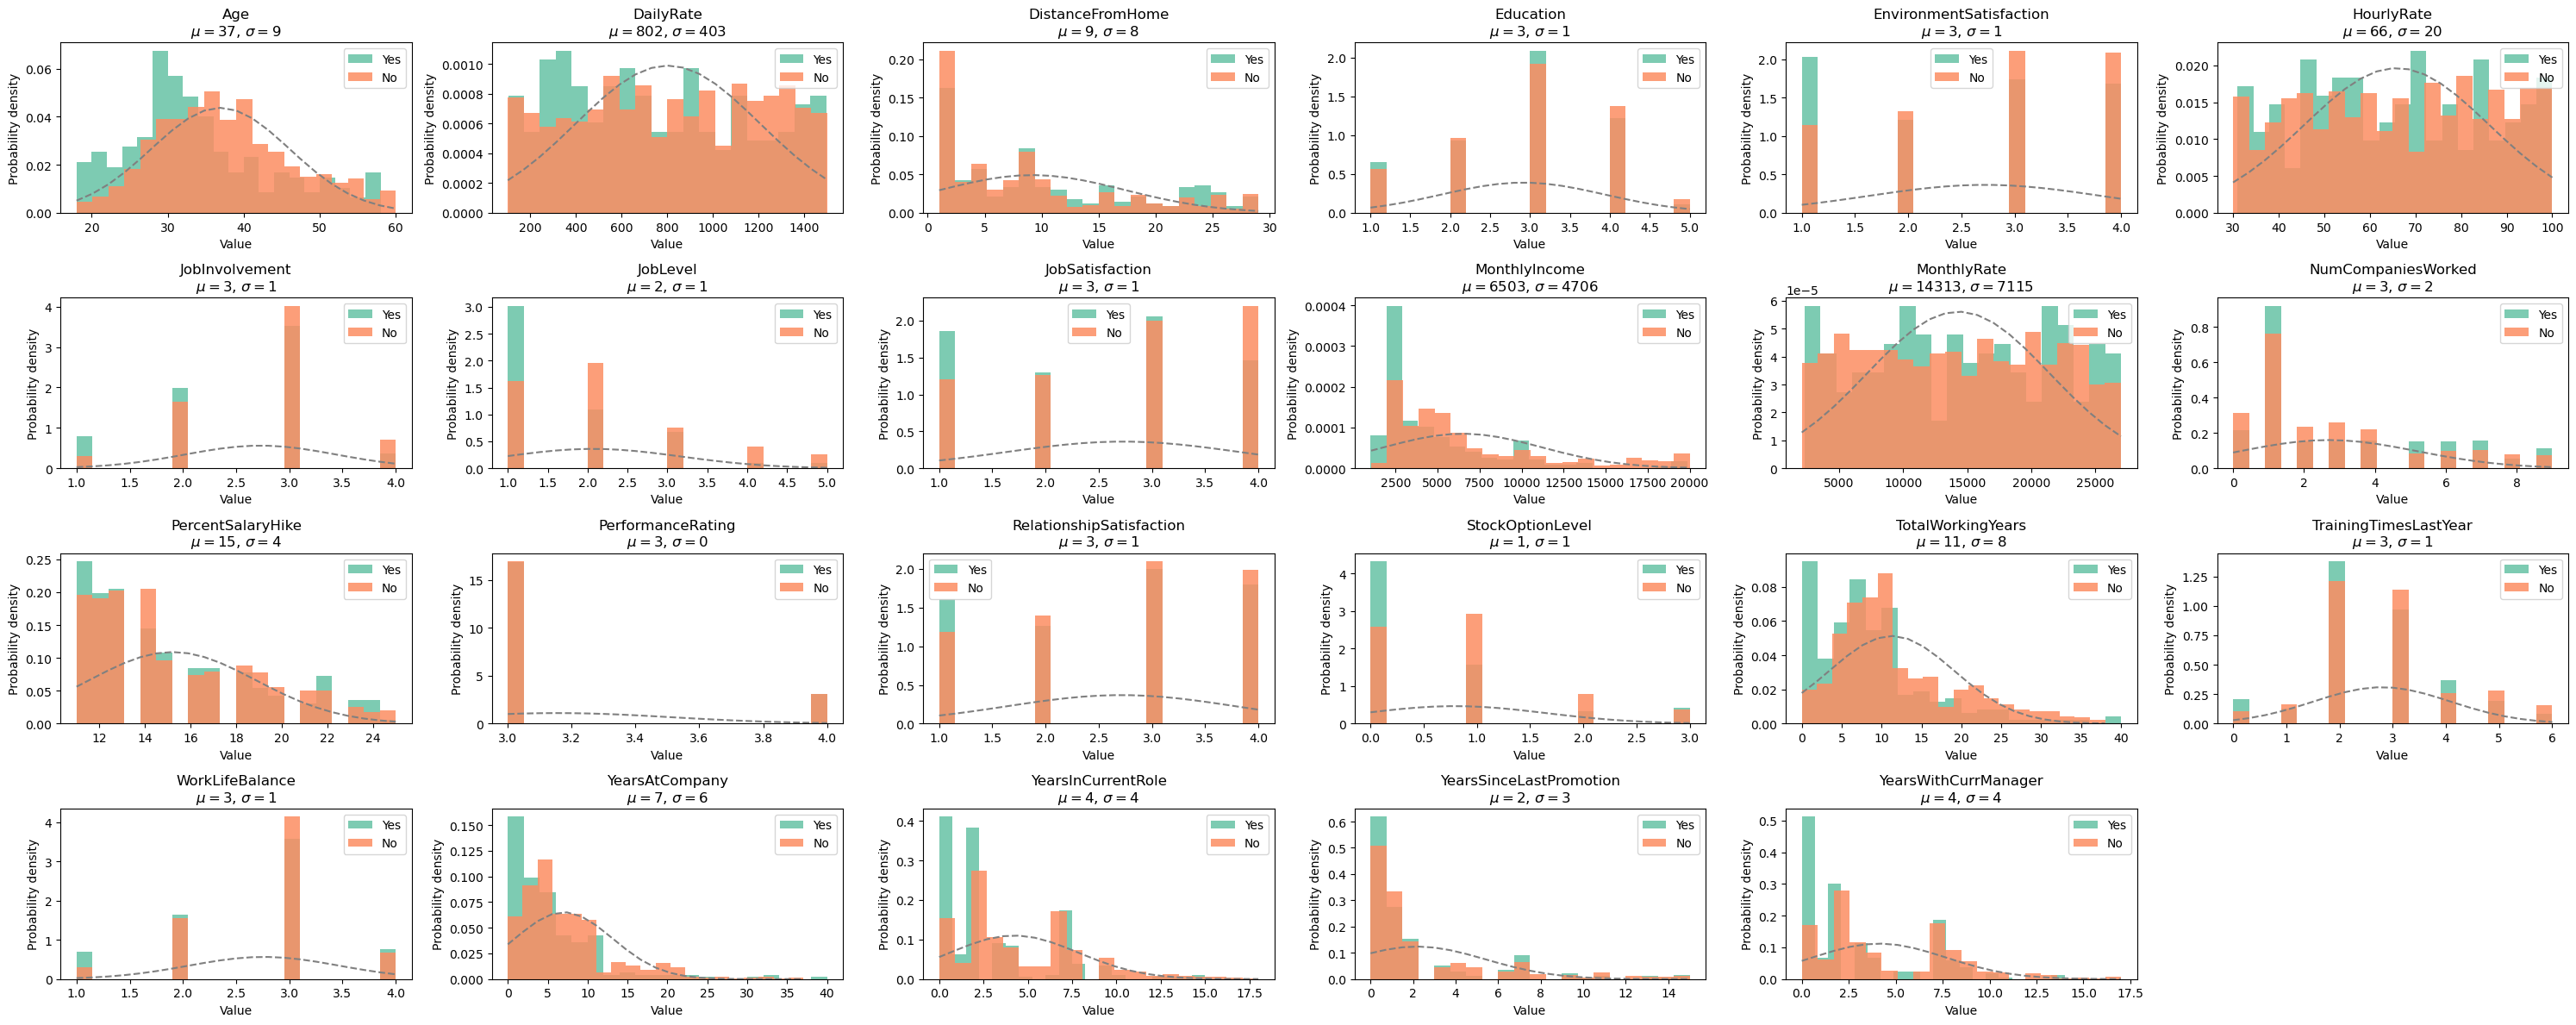

In [10]:
function_dist(emp, numeric_cols, hue='Attrition', num_bins=20)

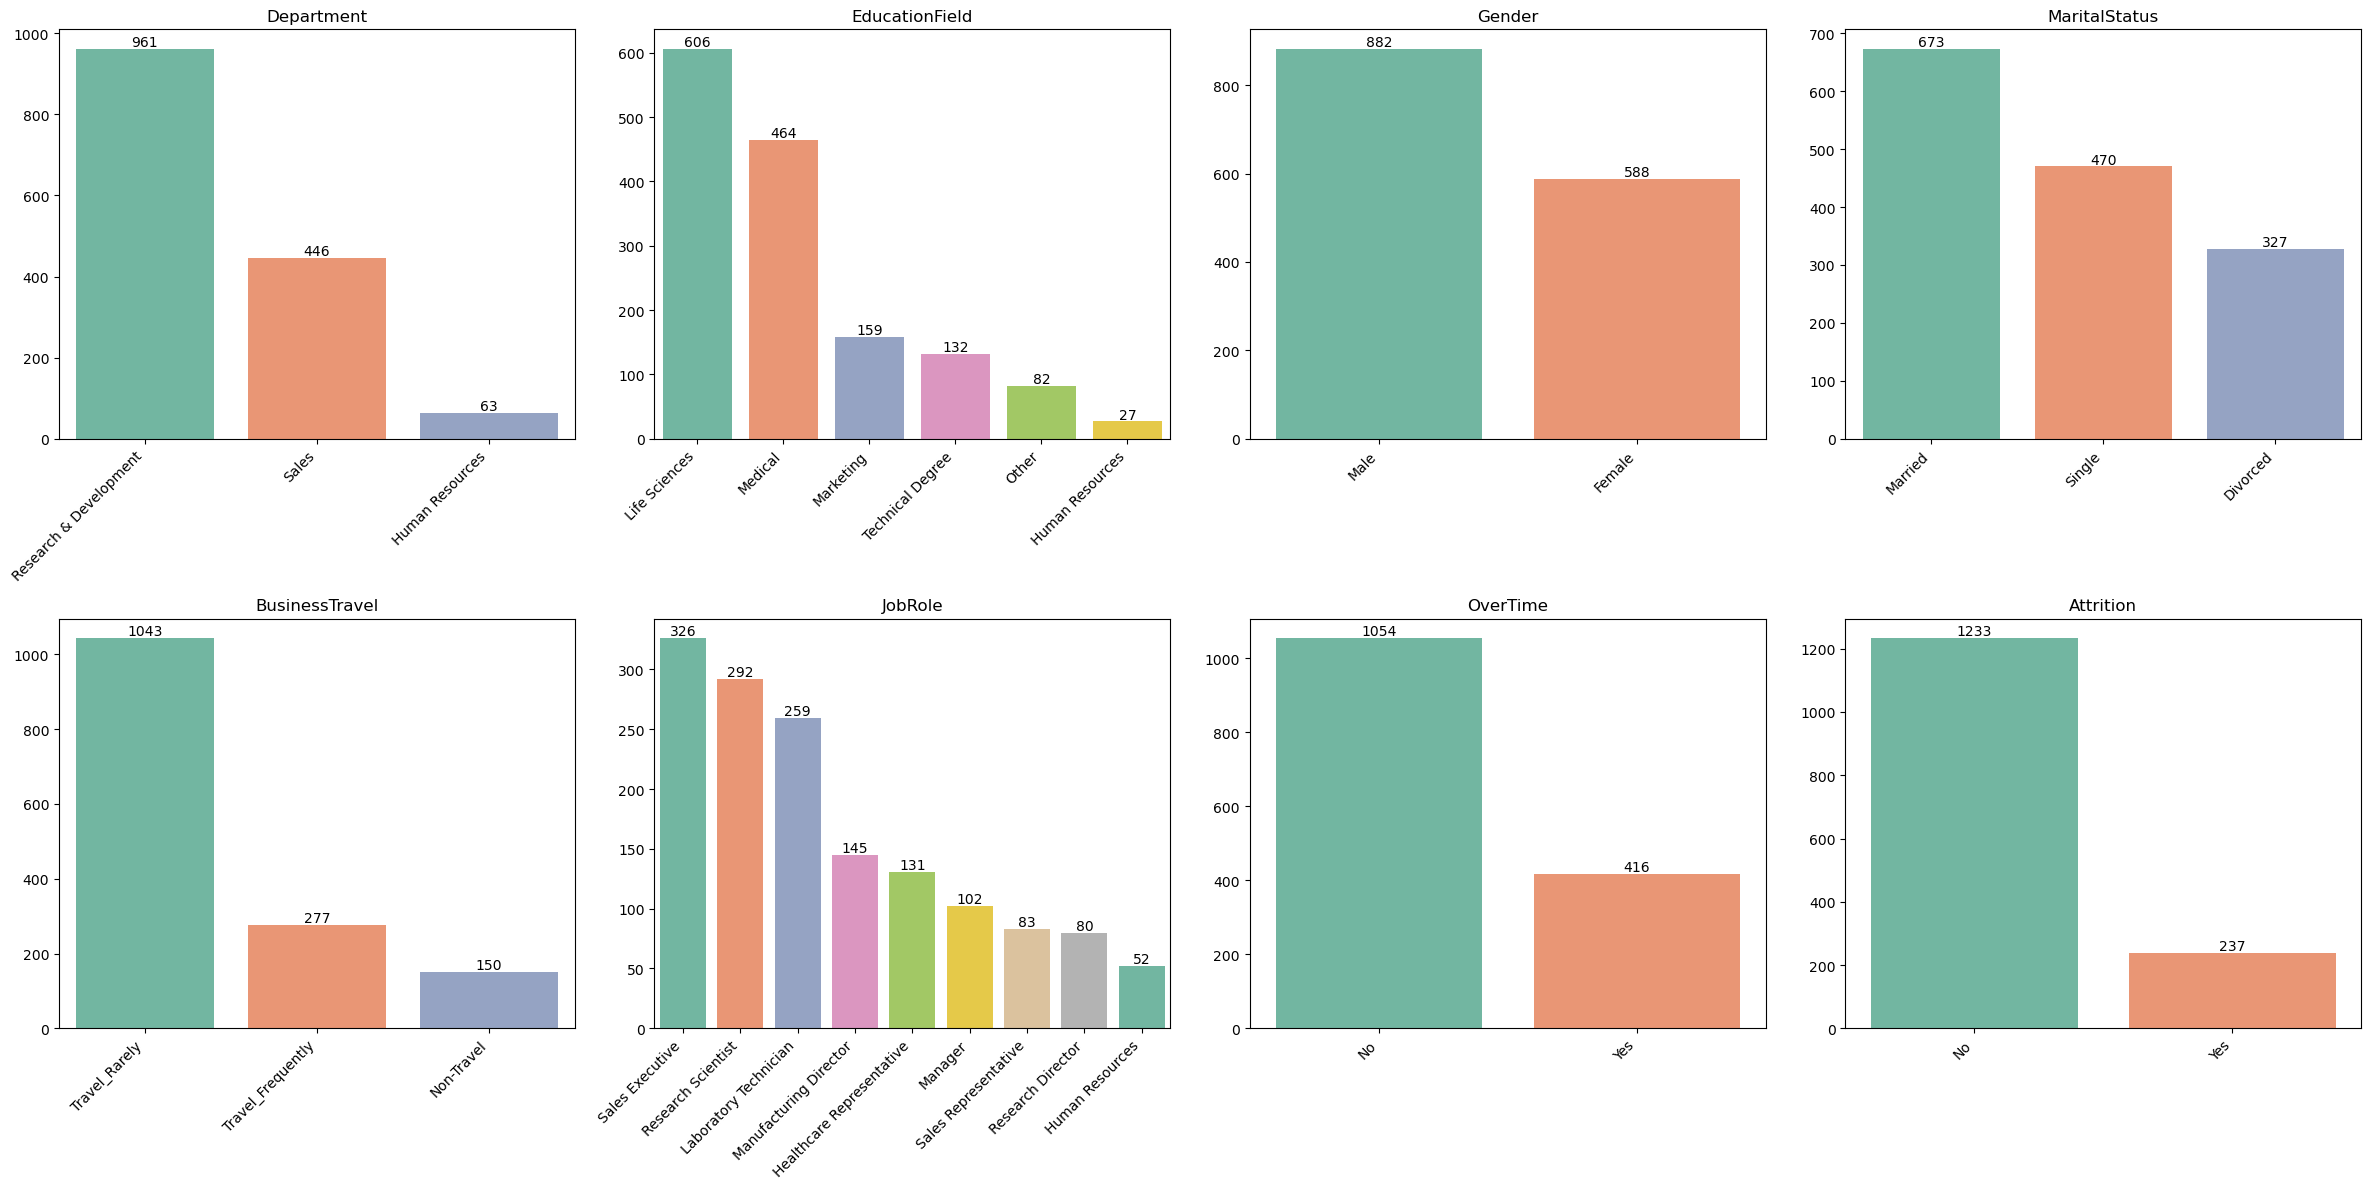

In [11]:
# barplot/countplot on obj cols
plt.figure(figsize=(24, 12))
for i in range(0, len(object_cols)):
    
    order = emp[object_cols[i]].value_counts().index
    plt.subplot(2, 4, i + 1)
    ax = sns.countplot(x=emp[object_cols[i]],
                       order=order, palette=sns.color_palette('Set2'))
    ax.set_title(f'{object_cols[i]}')
    ax.set_xlabel("")
    ax.set_ylabel("")

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

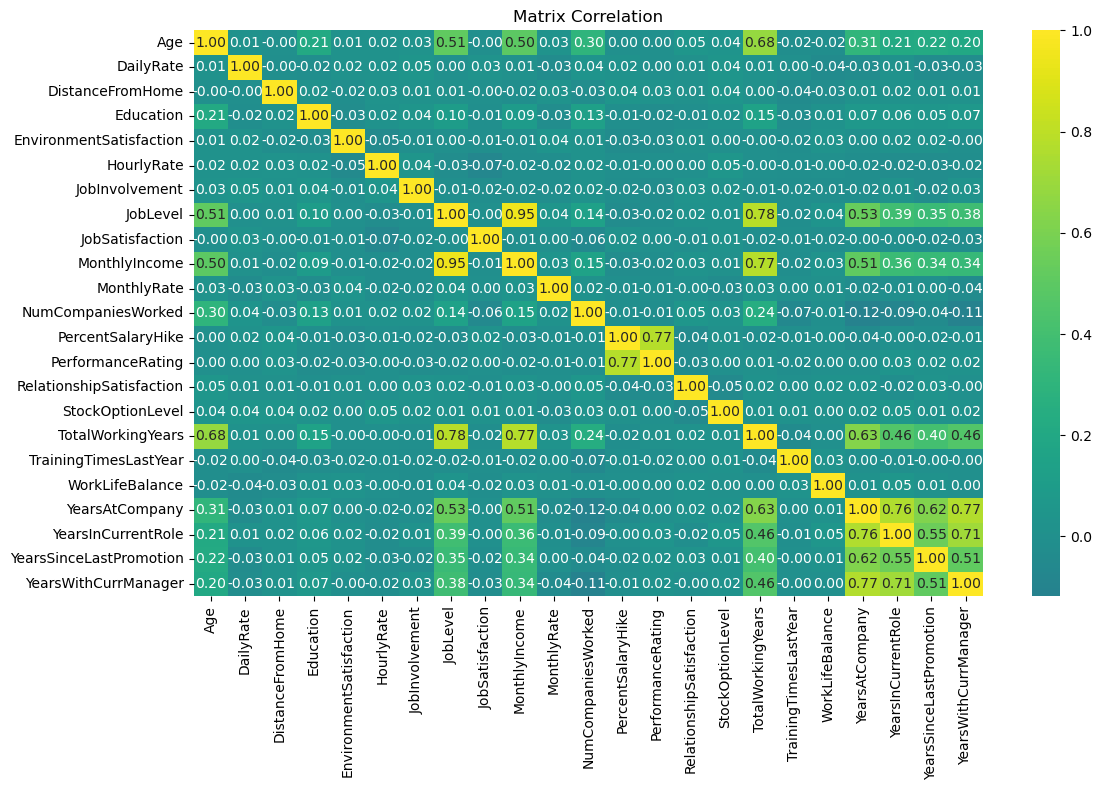

In [12]:
# setup figure dan color palette
plt.figure(figsize=(12, 8))

# heatmap matrix correlation
sns.heatmap(emp[numeric_cols].corr(), annot=True, fmt=".2f", cbar=True, center=0, cmap='viridis')
plt.title('Matrix Correlation')

plt.tight_layout()
plt.show()

In [13]:
# label encoding target
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
emp['Attrition'] = le.fit_transform(emp['Attrition'])
emp['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [14]:
# label encoding feature
le_features = LabelEncoder()
for col in ['Gender','OverTime']:
    emp[col] = le_features.fit_transform(emp[col])

emp[['Gender','OverTime']].head()

,Gender,OverTime
0,0,1
1,1,0
2,1,1
3,0,1
4,1,0


In [15]:
# one-hot encoding feature
columns_to_encode = ['Department', 'EducationField', 'MaritalStatus', 'BusinessTravel', 'JobRole']
emp = pd.get_dummies(data=emp, columns=columns_to_encode, drop_first=True)
emp.head()

,Age,Gender,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,0,1102,1,2,2,94,3,2,4,...,0,1,0,0,0,0,0,0,1,0
1,49,1,279,8,1,3,61,2,2,2,...,1,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,1,0,0,0,0,0,0,1,0,0
4,27,1,591,2,1,1,40,3,1,2,...,0,1,0,1,0,0,0,0,0,0


In [16]:
log_cols = ['MonthlyIncome',
            'NumCompaniesWorked',
            'TotalWorkingYears',
            'YearsAtCompany',
            'YearsSinceLastPromotion',
            'TrainingTimesLastYear',
             'YearsInCurrentRole',
             'YearsWithCurrManager']

norm_cols = ['Age',
             'DailyRate',
             'DistanceFromHome',
             'HourlyRate',
             'JobInvolvement',
             'MonthlyRate',
             'OverTime',
             'PercentSalaryHike',
             'StockOptionLevel']

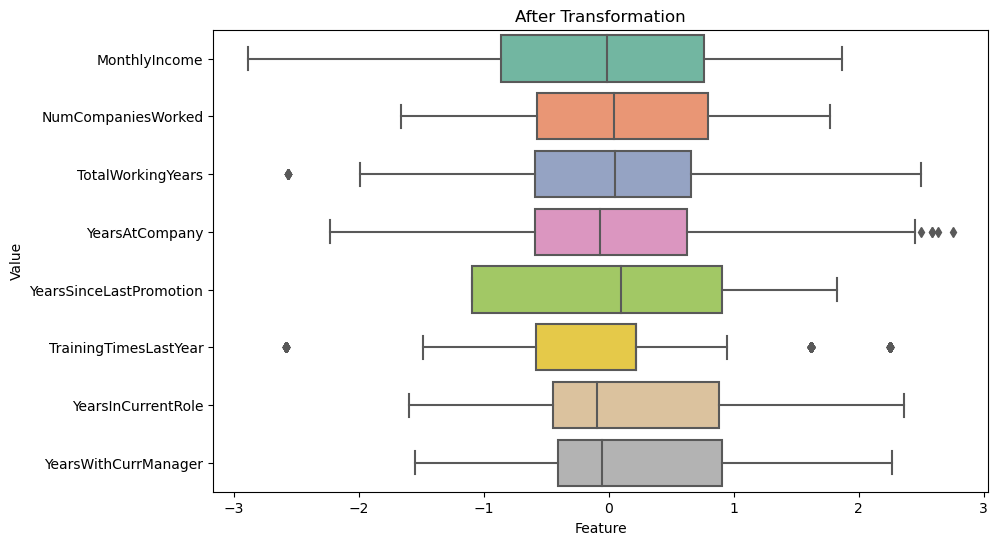

In [17]:
# feature transformation using powertransformers
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
emp[log_cols] = scaler.fit_transform(emp[log_cols])

# Melt the DataFrame
emp_melted = emp.melt(value_vars=log_cols)

# Show distribution using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='variable', x='value', data=emp_melted, orient='h', palette='Set2')
plt.title('After Transformation')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

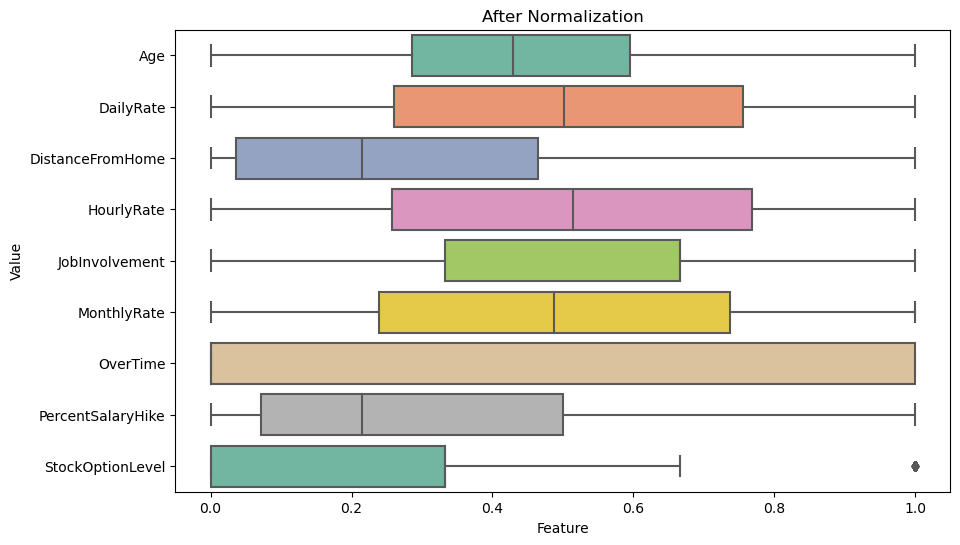

In [18]:
from sklearn.preprocessing import MinMaxScaler

sns.set_palette('Set2')

# Assuming emp and norm_cols are defined
minmax = MinMaxScaler()
emp[norm_cols] = minmax.fit_transform(emp[norm_cols])

# Melt the DataFrame
emp_melted = emp.melt(value_vars=norm_cols)

# Show distribution using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='variable', x='value', data=emp_melted, orient='h', palette='Set2')
plt.title('After Normalization')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X = emp.drop('Attrition', axis=1)
y = emp[['Attrition']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=212)

In [20]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
            'JobInvolvement', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
            'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cat_cols = ['Gender', 'Education', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
            'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 
            'Department_Research & Development', 'Department_Sales',
            'EducationField_Life Sciences', 'EducationField_Marketing',
            'EducationField_Medical', 'EducationField_Other',
            'EducationField_Technical Degree', 'MaritalStatus_Married',
            'MaritalStatus_Single', 'BusinessTravel_Travel_Frequently',
            'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources',
            'JobRole_Laboratory Technician', 'JobRole_Manager',
            'JobRole_Manufacturing Director', 'JobRole_Research Director',
            'JobRole_Research Scientist', 'JobRole_Sales Executive',
            'JobRole_Sales Representative']


Table of Selected Features:
                    Feature  F_Statistic       P_Value
4             MonthlyIncome    54.960698  2.347292e-13
5         TotalWorkingYears    53.625532  4.493691e-13
7            YearsAtCompany    39.608828  4.373073e-10
0                       Age    35.398721  3.541537e-09
10     YearsWithCurrManager    34.522829  5.481488e-09
8        YearsInCurrentRole    33.243497  1.038615e-08
3            JobInvolvement    19.137435  1.324385e-05
9   YearsSinceLastPromotion     5.308385  2.139698e-02
1                 DailyRate     4.405621  3.603382e-02
2          DistanceFromHome     4.354396  3.712886e-02
6     TrainingTimesLastYear     3.985307  4.612936e-02


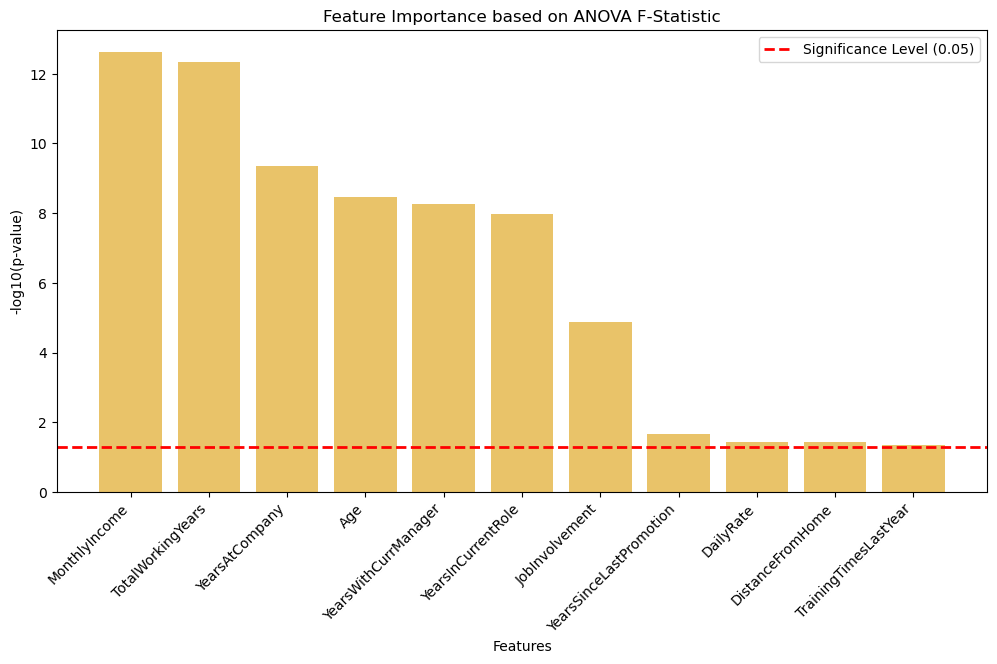

In [21]:
# features selection using f_classif (anova)
from sklearn.feature_selection import f_classif

# compute F-statistic and p-value for each feature
f_statistic, p_values = f_classif(X_train[num_cols], y_train)

# determine significance level (alpha)
alpha = 0.05

# select features with p-value less than 0.05 (95%, commonly used significance level)
selected_features_indices = np.where(p_values < alpha)[0]
selected_feature_names = X_train[num_cols].columns[selected_features_indices].tolist()

# create DataFrame with F-statistic and p-value information for selected features
selected_features_anova = pd.DataFrame({
    'Feature': selected_feature_names,
    'F_Statistic': f_statistic[selected_features_indices],
    'P_Value': p_values[selected_features_indices]
})
# sort DataFrame based on F-statistic in descending order
selected_features_anova = selected_features_anova.sort_values(by='F_Statistic', ascending=False)

# display selected features along with F-statistic scores in tabular form
print("\nTable of Selected Features:")
print(selected_features_anova)

# display scores in a plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_anova['Feature'], -np.log10(selected_features_anova['P_Value']), color='#e9c369')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed', linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on ANOVA F-Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [22]:
# selection feature both on train and test data
X_train_anova = X_train.loc[:, selected_feature_names]
X_test_anova = X_test.loc[:, selected_feature_names]


Table of Selected Features:
                             Feature  Chi_Statistic       P_Value
2                           OverTime      56.457030  5.743999e-14
13      JobRole_Sales Representative      25.668863  4.053142e-07
0                           JobLevel      21.175301  4.191312e-06
7               MaritalStatus_Single      20.871268  4.912077e-06
8   BusinessTravel_Travel_Frequently      15.052547  1.045591e-04
9      JobRole_Laboratory Technician      12.084694  5.083746e-04
12         JobRole_Research Director       9.951909  1.606827e-03
10                   JobRole_Manager       8.925405  2.812311e-03
1                    JobSatisfaction       7.131379  7.574644e-03
11    JobRole_Manufacturing Director       7.084043  7.777334e-03
5    EducationField_Technical Degree       5.782014  1.619098e-02
3                   Department_Sales       5.012006  2.517213e-02
6              MaritalStatus_Married       4.574863  3.244434e-02
4           EducationField_Marketing       3.88

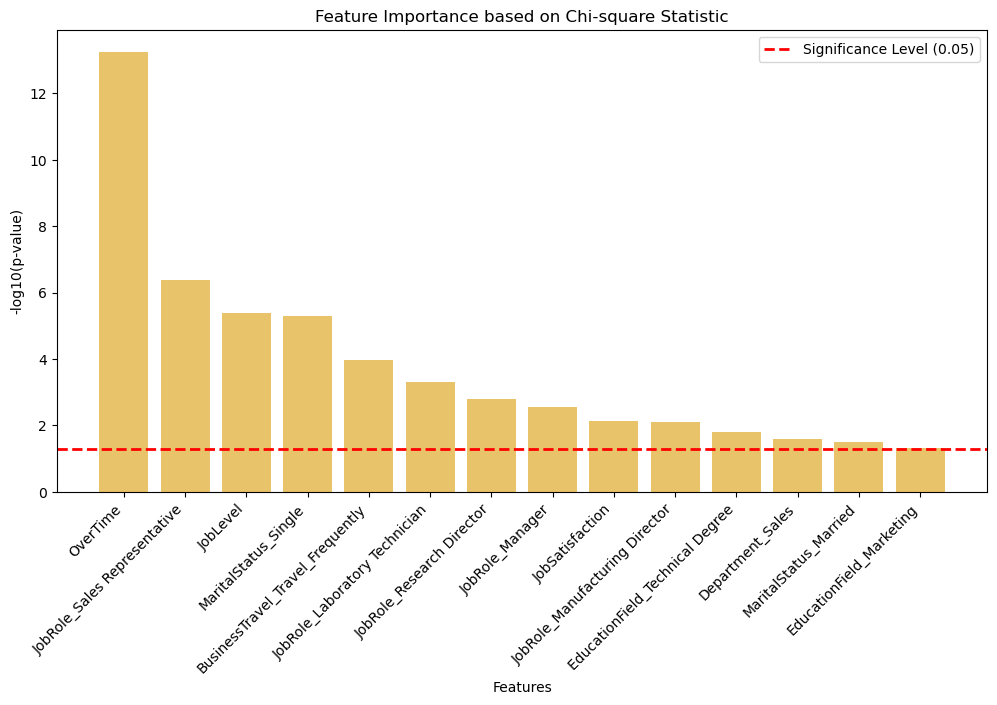

In [23]:
# perform feature selection using chi-square test
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# compute chi-square statistic and p-value for each feature
chi2_stat, p_values_chi2 = chi2(X_train[cat_cols], y_train)

# determine significance level (alpha)
alpha = 0.05

# select features with p-value less than 0.05 (95% confidence level)
selected_features_chi2_indices = np.where(p_values_chi2 < alpha)[0]
selected_features_chi2_names = X_train[cat_cols].columns[selected_features_chi2_indices].tolist()

# create DataFrame with Chi-statistic and p-value information for selected features
selected_features_chi = pd.DataFrame({
    'Feature': selected_features_chi2_names,
    'Chi_Statistic': chi2_stat[selected_features_chi2_indices],
    'P_Value': p_values_chi2[selected_features_chi2_indices]
})
# sort DataFrame based on Chi-statistic in descending order
selected_features_chi = selected_features_chi.sort_values(by='Chi_Statistic', ascending=False)

# display selected features along with Chi-statistic scores in tabular form
print("\nTable of Selected Features:")
print(selected_features_chi)

# display scores in a plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_chi['Feature'], -np.log10(selected_features_chi['P_Value']), color='#e9c369')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed', linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on Chi-square Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [24]:
# selection feature both on train and test data
X_train_chi2 = X_train.loc[:, selected_features_chi2_names]
X_test_chi2 = X_test.loc[:, selected_features_chi2_names]

In [25]:
# concat selected features from anova and chi2
X_train = pd.concat([X_train_anova, X_train_chi2], axis=1)
X_test = pd.concat([X_test_anova, X_test_chi2], axis=1)

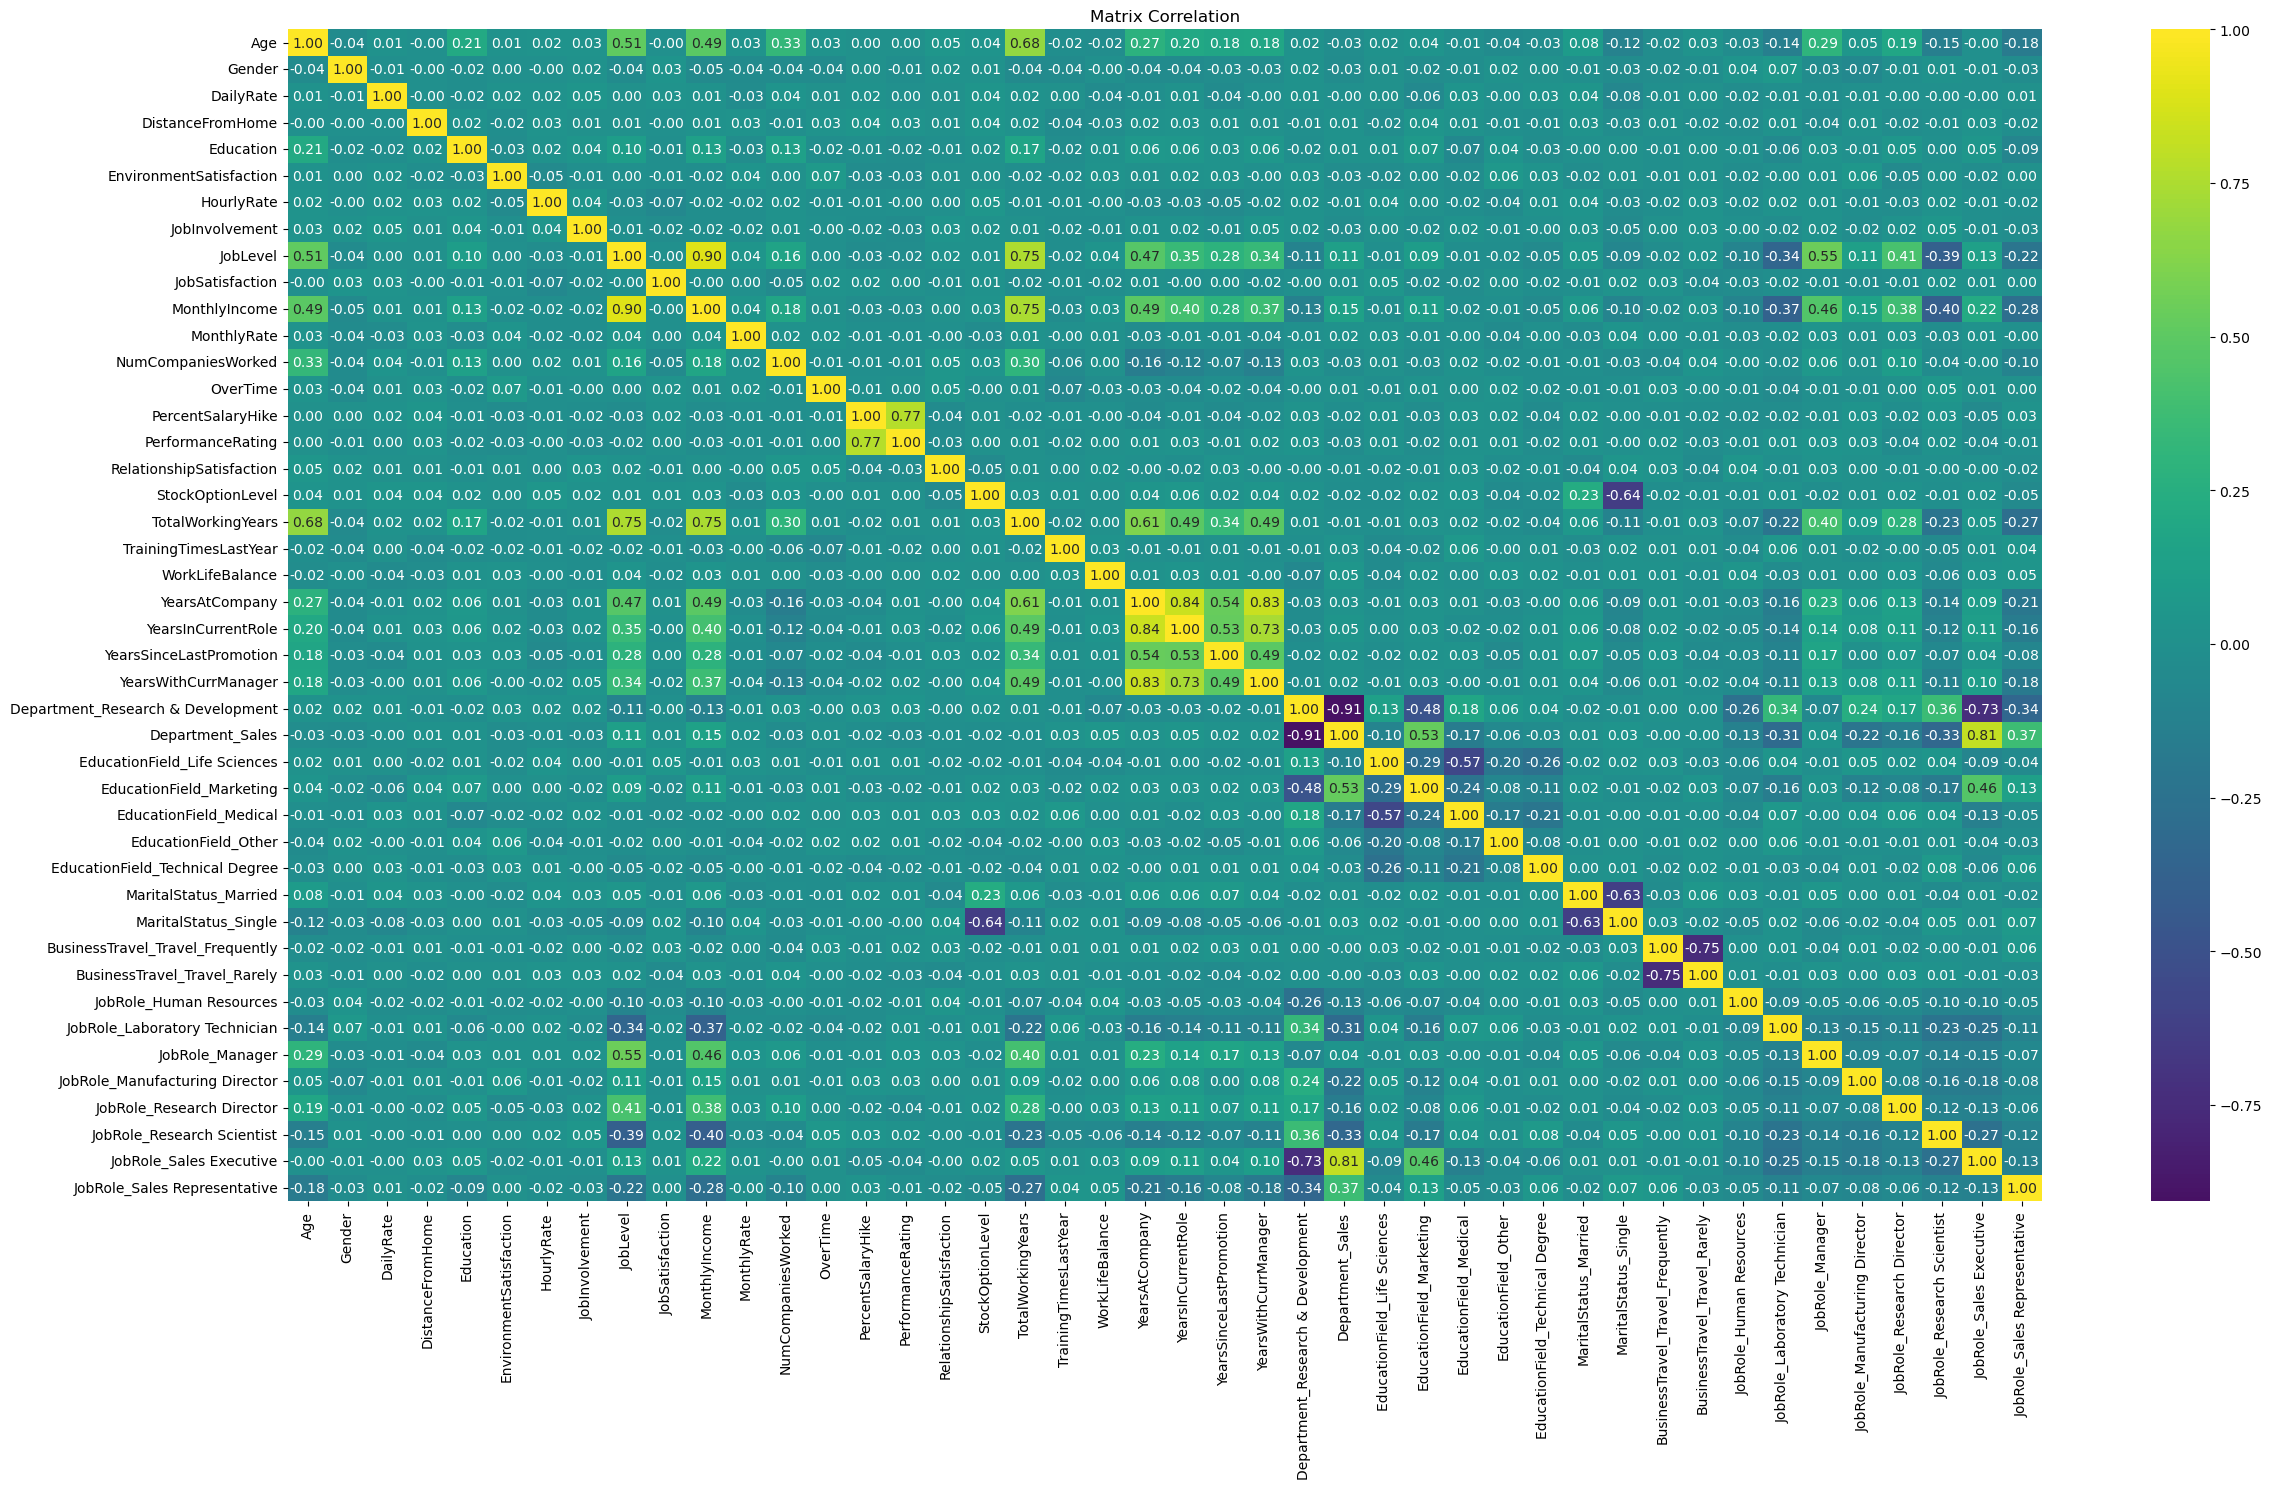

In [26]:
# setup figure dan color palette
plt.figure(figsize=(25, 15))

# heatmap matrix correlation
sns.heatmap(emp.drop('Attrition', axis=1).corr(), annot=True, fmt=".2f", cbar=True, center=0, cmap='viridis')
plt.title('Matrix Correlation')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, log_loss, classification_report

In [28]:
def models_accuracy(X_train, y_train, X_test, y_test):

    models = [
        LogisticRegression(),
        RidgeClassifier(),
        SVC(probability=True),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        XGBClassifier()]

    results_list_test = []
    results_list_train = []
    results_list_diff = []
    results_list_diff_pct = []

    for model in models:
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        avg_cv_accuracy = cv_scores.mean()

        model.fit(X_train, y_train)

        # Learning Curve
        # plot_learning_curve(model, f"{type(model).__name__}", X_train, y_train, cv=5)

        # test set evaluation
        y_pred_test = model.predict(X_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        results_test = {
            "Model": type(model).__name__,
            "CV Accuracy": avg_cv_accuracy,
            "Accuracy": accuracy_test
        }
        results_list_test.append(results_test)

        # train set evaluation
        y_pred_train = model.predict(X_train)
        accuracy_train = accuracy_score(y_train, y_pred_train)

        results_train = {
            "Model": type(model).__name__,
            "Accuracy": accuracy_train
        }
        results_list_train.append(results_train)

        # diff evaluation
        results_diff = {
            "Model": type(model).__name__,
            "Accuracy_Difference": accuracy_train - accuracy_test
        }
        results_list_diff.append(results_diff)

        # diff evaluation pct
        results_diff_pct = {
            "Model": type(model).__name__,
            "Accuracy_Difference": ((accuracy_train - accuracy_test) / accuracy_train) * 100
        }
        results_list_diff_pct.append(results_diff_pct)

    # dataframe from test and test evaluation
    results_test_df = pd.DataFrame(results_list_test)
    results_test_df.set_index("Model", inplace=True)

    results_train_df = pd.DataFrame(results_list_train)
    results_train_df.set_index("Model", inplace=True)

    # dataframe evaluations diff
    results_diff_df = pd.DataFrame(results_list_diff)
    results_diff_df.set_index("Model", inplace=True)

    # dataframe evaluation diff pct
    results_diff_pct_df = pd.DataFrame(results_list_diff_pct)
    results_diff_pct_df.set_index("Model", inplace=True)

    # new df
    evaluation_df = pd.DataFrame(index=[type(model).__name__ for model in models])
    evaluation_df['CV Accuracy'] = results_test_df['CV Accuracy']
    evaluation_df['Accuracy_Train'] = results_train_df['Accuracy']
    evaluation_df['Accuracy_Test'] = results_test_df['Accuracy']
    evaluation_df['Diff'] = results_diff_df['Accuracy_Difference']
    evaluation_df['Diff (%)'] = results_diff_pct_df['Accuracy_Difference']

    return evaluation_df

In [29]:
# evaluation in default parameter of all algorithm
default_accuracy = models_accuracy(X_train, y_train, X_test, y_test)
default_accuracy

,CV Accuracy,Accuracy_Train,Accuracy_Test,Diff,Diff (%)
LogisticRegression,0.879246,0.887755,0.867347,0.020408,2.298851
RidgeClassifier,0.860541,0.864796,0.853741,0.011054,1.278269
SVC,0.859701,0.866497,0.843537,0.022959,2.649657
KNeighborsClassifier,0.851194,0.882653,0.846939,0.035714,4.046243
DecisionTreeClassifier,0.779766,1.000000,0.816327,0.183673,18.367347
RandomForestClassifier,0.865640,1.000000,0.836735,0.163265,16.326531
AdaBoostClassifier,0.863094,0.883503,0.863946,0.019558,2.213667
GradientBoostingClassifier,0.859686,0.931973,0.870748,0.061224,6.569343
XGBClassifier,0.853732,1.000000,0.857143,0.142857,14.285714


In [30]:
# references: 
    # https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
    # https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d
    # https://medium.com/thrive-in-ai/classification-algorithms-in-python-5f58a7a27b88

# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.885714 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.882993 (0.019825) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.882766 (0.020308) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.883220 (0.019723) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.883220 (0.019566) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.883220 (0.020789) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.882313 (0.021234) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.885034 (0.020283) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.885034 (0.020283) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.885714 (0.020738) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.880499 (0.013569) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.880499 (0.013569) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.880045 (0.013773) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.845805 (0.005913) wit

In [31]:
# hyperparameter tuning logreg
params = {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
logreg = LogisticRegression(**params)

cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)
logreg.fit(X_train, y_train)

accuracy_train = accuracy_score(y_train, logreg.predict(X_train))
accuracy_test = accuracy_score(y_test, logreg.predict(X_test))

print('Cross-Validation Mean Accuracy : {:.2f}'.format(cv_scores.mean()))
print('Accuracy Train Score : {:.2f}'.format(accuracy_train))
print('Accuracy Test Score : {:.2f}'.format(accuracy_test))

Cross-Validation Mean Accuracy : 0.88
Accuracy Train Score : 0.89
Accuracy Test Score : 0.86


In [32]:
# cm using logreg
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(emp['Attrition'].values, logreg.predict(emp[X_test.columns].values))
print(classification_report(emp['Attrition'].values, logreg.predict(emp[X_test.columns].values)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1233
           1       0.80      0.36      0.50       237

    accuracy                           0.88      1470
   macro avg       0.85      0.67      0.72      1470
weighted avg       0.88      0.88      0.86      1470



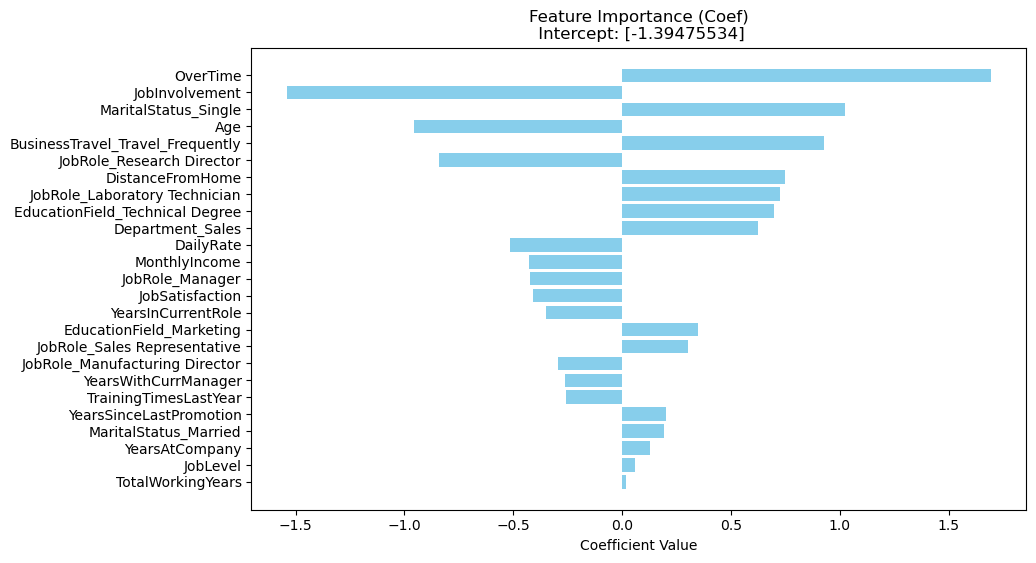

In [33]:
import matplotlib.pyplot as plt

# Train the logistic regression model
logreg.fit(X_train, y_train)

# Get the coefficients
coefficients = logreg.coef_[0]
intercept = logreg.intercept_
feature_names = X_train.columns

# Pair the feature names with the coefficients
feature_importance = dict(zip(feature_names, coefficients))

# Sort feature importance by absolute value of coefficients
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and coefficients for plotting
features = [x[0] for x in sorted_feature_importance]
importances = [x[1] for x in sorted_feature_importance]

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title(f'Feature Importance (Coef)\n Intercept: {intercept}')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


Text(0.5, 23.52222222222222, 'Predicted Label')

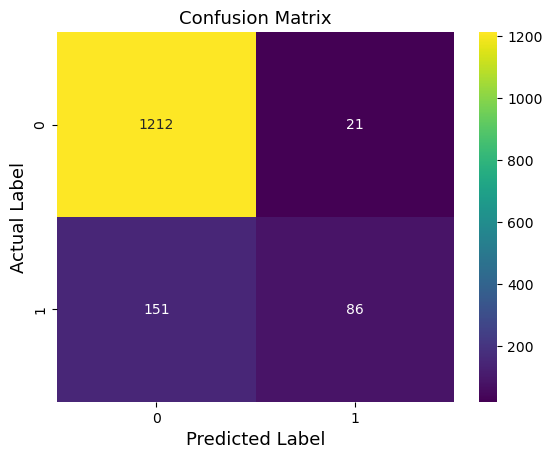

In [34]:
tn, fp, fn, tp = cm.ravel()
sns.heatmap(cm, annot=True, fmt='.0f', cmap='viridis')
plt.title(f'Confusion Matrix', fontsize=13, color='black')
plt.ylabel('Actual Label', fontsize=13)
plt.xlabel('Predicted Label', fontsize=13)

In [35]:
emp['AttritionPred'] = logreg.predict(emp[X_train.columns])
emp.head()

,Age,Gender,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,BusinessTravel_Travel_Rarely,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,AttritionPred
0,0.547619,0,0.715820,0.000000,2,2,0.914286,0.666667,2,4,...,1,0,0,0,0,0,0,1,0,0
1,0.738095,1,0.126700,0.250000,1,3,0.442857,0.333333,2,2,...,0,0,0,0,0,0,1,0,0,0
2,0.452381,1,0.909807,0.035714,2,4,0.885714,0.333333,1,3,...,1,0,1,0,0,0,0,0,0,1
3,0.357143,0,0.923407,0.071429,4,4,0.371429,0.666667,1,3,...,0,0,0,0,0,0,1,0,0,0
4,0.214286,1,0.350036,0.035714,1,1,0.142857,0.666667,1,2,...,1,0,1,0,0,0,0,0,0,0


In [36]:
emp['AttritionPred'].value_counts()

0    1363
1     107
Name: AttritionPred, dtype: int64

In [37]:
emp['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [38]:
# export to csv
emp[['Attrition','AttritionPred']].to_csv('result-predictions.csv', index=False)